In [ ]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from copy import deepcopy
from skimage.io import imread

# Extragerea frontierelor


## Grayscale + Blur

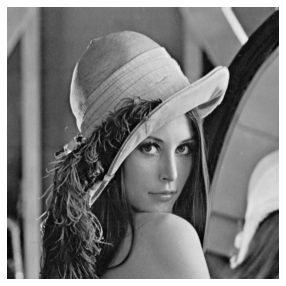

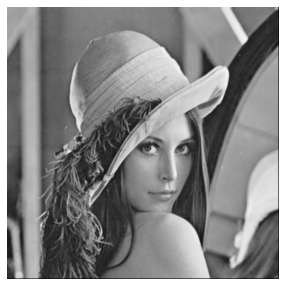

In [ ]:
# citire imagine
img = imread('image_lenna.png')

# grayscale
gray = 0.21 * img[:,:,0] + 0.71 * img[:,:,1] + 0.07 * img[:,:,2]


# blur
# Definiți dimensiunea măștii de filtrare
kernel_size = 2
# Creați o mască de filtrare 2x2 cu valori uniforme și normalizați-o
kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
# Creează un array numpy cu aceleași dimensiuni ca imaginea în tonuri de gri
blurred_image = np.zeros_like(gray)
# Parcurge fiecare pixel al imaginii în tonuri de gri
for i in range(gray.shape[0]-kernel_size+1):
  for j in range(gray.shape[1]-kernel_size+1):
    sum_val = 0
    # Calculează valoarea sumei pentru fiecare pixel din zona de acoperire a măștii de filtrare
    for x in range(kernel_size):
      for y in range(kernel_size):
        sum_val += gray[i+x, j+y]
    # Calculează valoarea medie a pixelilor din zona de acoperire a măștii de filtrare 
    blurred_image[i,j] = sum_val / (kernel_size * kernel_size)

# afisari
fig = plt.figure(figsize=(5,5))
plt.imshow(gray, cmap="gray")
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(5,5))
plt.imshow(blurred_image, cmap="gray")
plt.axis('off')
plt.show()

## Detectorul Sobel

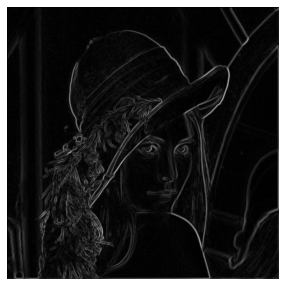

In [ ]:
# Definiți niște măști de filtrare numite „kernel_x” și „kernel_y” și 
# creați două matrici de aceeași dimensiune cu imaginea blurata
# în care vor fi stocate gradientele în directia x și y
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
gradient_x = np.zeros_like(blurred_image)

kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
gradient_y = np.zeros_like(blurred_image)

# Parcurgeți fiecare linie și coloană a imaginii blurate
i = 1
while i < blurred_image.shape[0]-1:
  j = 1
  while j < blurred_image.shape[1]-1:
    # Calculați gradient_x și gradient_y prin intermediul convolutiei imaginii blurate cu kernel_x, respectiv kernel_y
    gradient_x[i, j] = (blurred_image[i-1, j-1] * kernel_x[0, 0] + blurred_image[i-1, j] * kernel_x[0, 1] + blurred_image[i-1, j+1] * kernel_x[0, 2] +
                        blurred_image[i, j-1] * kernel_x[1, 0] + blurred_image[i, j] * kernel_x[1, 1] + blurred_image[i, j+1] * kernel_x[1, 2] +
                        blurred_image[i+1, j-1] * kernel_x[2, 0] + blurred_image[i+1, j] * kernel_x[2, 1] + blurred_image[i+1, j+1] * kernel_x[2, 2])
    
    gradient_y[i, j] = (blurred_image[i-1, j-1] * kernel_y[0, 0] + blurred_image[i-1, j] * kernel_y[0, 1] + blurred_image[i-1, j+1] * kernel_y[0, 2] +
                        blurred_image[i, j-1] * kernel_y[1, 0] + blurred_image[i, j] * kernel_y[1, 1] + blurred_image[i, j+1] * kernel_y[1, 2] +
                        blurred_image[i+1, j-1] * kernel_y[2, 0] + blurred_image[i+1, j] * kernel_y[2, 1] + blurred_image[i+1, j+1] * kernel_y[2, 2])
    j += 1
  i += 1

# Calculați puterea marginii
edges = np.sqrt(np.power(gradient_x, 2) + np.power(gradient_y, 2))

fig = plt.figure(figsize=(5,5))
plt.imshow(edges, cmap="gray")
plt.axis('off')
plt.show()

## Non-maxima suppression

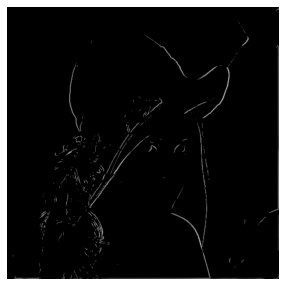

In [ ]:
def non_max_suppression(img, direction):
  # dimensiunea imaginii
  M, N = img.shape
  #initializam output cu matrice de aceeasi dimensiune cu valori 0
  output = np.zeros((M, N))

  #calculam unghiul pentru fiecare pixel
  angle = direction * 180. / np.pi
  #unghiurile negative le aducem la intervalul [0,180]
  angle[angle < 0] += 180

  #parcurgem fiecare pixel din imagine
  for i in range(1, M-1):
    for j in range(1, N-1):
      try:
        q = 255
        r = 255

        # verificam unghiul pixelului curent si setam pixelii vecini din stanga 
        # si din dreapta in functie de unghi
        
        # angle 0 pixelii vecini sunt din stanga si dreapta
        if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
          q = img[i, j+1]
          r = img[i, j-1]
        # angle 45 pixelii vecini sunt din diagonala sus-stanga si jos-dreapta
        elif (22.5 <= angle[i, j] < 67.5):
          q = img[i+1, j-1]
          r = img[i-1, j+1]
        # angle 90 pixelii vecini sunt de deasupra si dedesubt
        elif (67.5 <= angle[i, j] < 112.5):
          q = img[i+1, j]
          r = img[i-1, j]
        # angle 135 pixelii vecini sunt din diagonala sus-dreapta si jos-stanga
        elif (112.5 <= angle[i, j] < 157.5):
          q = img[i-1, j-1]
          r = img[i+1, j+1]

        # verificam daca pixelul curent este mai mare decat vecinii sai si pastram
        # sau setam la 0
        if (img[i, j] >= q) and (img[i, j] >= r):
          output[i, j] = img[i, j]
        else:
          output[i, j] = 0

      # pentru evitarea in caz ca se acceseaza pixeli din afara imaginii
      except IndexError as e:
        pass

  return output

direction = edges
nms_img = non_max_suppression(edges, direction)
fig = plt.figure(figsize=(5,5))
plt.imshow(nms_img, cmap="gray")
plt.axis('off')
plt.show()

## Hysteresis thresholding

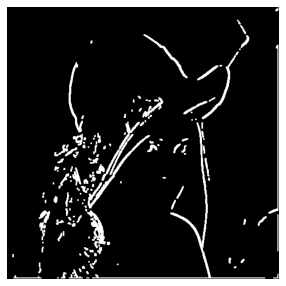

!daca kernel size este 1, arata mai bine!


In [ ]:
def hysteresis_thresholding(image, low_limit, high_limit):
  # cream o noua imagine cu aceeasi dimensiune
  hytr_img = np.zeros_like(image)
  # setam toti pixelii cu valoare mai mare decat high_limit la 255
  hytr_img[image > high_limit] = 255
  # setam toti pixelii cu valoare mai mica decat low_limit la 0
  hytr_img[image < low_limit] = 0
  
  # verificam 8 vecini ai pixelului
  for i in range(1, image.shape[0]-1):
    for j in range(1, image.shape[1]-1):
      if hytr_img[i, j] == 0:
        neighborhood = image[i-1:i+2, j-1:j+2]
        # daca cel putin un vecin are valoare mai mare decat high_limit, 
        # setam pixelul curent la 255
        if np.any(neighborhood > high_limit):
          hytr_img[i, j] = 255
  return hytr_img

# media valorilor pixelilor din imaginea "nms_img"
mean = np.mean(nms_img)
low_threshold = mean * 0.5
high_threshold = mean * 0.8

output1 = hysteresis_thresholding(nms_img, low_threshold, high_threshold)

fig = plt.figure(figsize=(5,5))
plt.imshow(output1, cmap="gray")
plt.axis('off')
plt.show()

print("!daca kernel size este 1, arata mai bine!")

# Reducerea numărului de culori si a zgomotului

## Reducerea numărului de culori

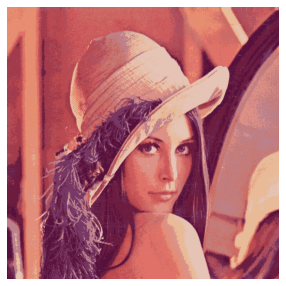

In [ ]:
def median_cut(image, img_arr, depth):
  # Creeaza o structura de date de stiva si o initializeaza cu un tuplu formata din
  # variabilele img_arr si depth.
  stack = [(img_arr,depth)]
  while stack:
    # Scoate ultimul element din stiva si il atribuie variabilelor img_arr si depth.
    img_arr,depth = stack.pop()

    if depth == 0:
      # Realizeaza cuantificarea culorii pentru img_arr prin calcularea mediei valorilor
      # R, G, si B pentru fiecare pixel si atribuie acestei valori medii fiecarui pixel din
      # noua imagine
      for data in img_arr:
        new_img[data[3]][data[4]] = [np.mean(img_arr[:,0]), # r_average
                              np.mean(img_arr[:,1]), # g_average
                              np.mean(img_arr[:,2])] # b_average
    else: # Daca adancimea curenta nu e 0, acesta gaseste spatiul culorii cu 
          # raza maxima prin scaderea valorii minime din valoarea maxima 
          # pentru fiecare spatiu de culoare R, G, si B
      space_with_highest_range = np.argmax([np.max(img_arr[:,0]) - np.min(img_arr[:,0]),  # r_range
                                      np.max(img_arr[:,1]) - np.min(img_arr[:,1]),  # g_range
                                      np.max(img_arr[:,2]) - np.min(img_arr[:,2])]) # b_range
      # Sorteaza img_arr in functie de spatiul de culoare cu raza maxima si il imparte in doua jumatati
      img_arr = img_arr[img_arr[:,space_with_highest_range].argsort()]
      left_half = img_arr[:len(img_arr) // 2]
      right_half = img_arr[len(img_arr) // 2:]

      # Adauga in stiva jumatatile stanga si dreapta ale lui img_arr cu adancimea actualizata -1
      stack.append((left_half,depth-1))
      stack.append((right_half,depth-1))
  return
new_img = img

flattened_img_array = np.array([[color[0], color[1], color[2], rindex, cindex] 
                                for rindex, rows in enumerate(new_img) 
                                for cindex, color in enumerate(rows)])
# Daca n_colors = 4, acest lucru inseamna 2^4 = 16 culori
median_cut(new_img, flattened_img_array, 4)

fig = plt.figure(figsize=(5,5))
plt.imshow(new_img, cmap="gray")
plt.axis('off')
plt.show()

## Reducerea zgomotului

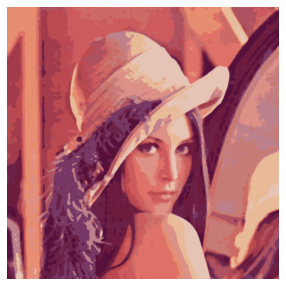

In [ ]:
def median_filter(image, kernel_size):
  # Creem o copie a imaginii originale
  filtered_image = image.copy()
  # Calculam offset-ul prin care vom muta kernel-ul
  offset = kernel_size // 2

  # Loop prin toti pixelii din imagine, excluzand marginile definite de offset
  for i in range(offset, len(image) - offset):
    for j in range(offset, len(image[0]) - offset):
      for k in range(3):
        # Inițializăm o lista pentru a stoca valorile pixelilor din kernel
        kernel = []

        # Loop prin vecini din kernel
        for x in range(-offset, offset + 1):
          for y in range(-offset, offset + 1):
            # Adăugăm valoarea pixelului la lista kernel
            kernel.append(image[i + x][j + y][k])
        # Sortăm lista kernel
        kernel.sort()
        # Atribuim pixelului din imaginea filtrată valoarea mediană a kerneului
        filtered_image[i][j][k] = kernel[len(kernel) // 2]

  # Returnează imaginea filtrată
  return filtered_image

output2 = median_filter(new_img, 4)

fig = plt.figure(figsize=(5,5))
plt.imshow(output2, cmap="gray")
plt.axis('off')
plt.show()

# Combine

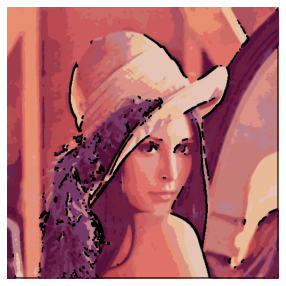

In [ ]:
output1 = np.dstack([output1, output1, output1])
final = np.where(output1 == 0, output2, 0)

fig = plt.figure(figsize=(5,5))
plt.imshow(final, cmap="gray")
plt.axis('off')
plt.show()
